![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
3018,id_3018,Brussels,"['European', 'Soups', 'Vegetarian Friendly', '...",1343.0,$$ - $$$,56.0,"[['Good food', 'A great lunch, different from ...",/Restaurant_Review-g188644-d5501593-Reviews-He...,d5501593,0,0.0
19412,id_3227,Barcelona,"['Chinese', 'Asian', 'Vegetarian Friendly']",3228.0,$$ - $$$,75.0,"[['Delicious', 'Authentic and delicious'], ['1...",/Restaurant_Review-g187497-d4227693-Reviews-Re...,d4227693,1,4.0
4598,id_4598,Amsterdam,"['Mediterranean', 'European', 'Middle Eastern']",2090.0,$,8.0,"[['Great coffee, sandwiches and friendly staf....",/Restaurant_Review-g188590-d8813805-Reviews-De...,d8813805,0,0.0
21077,id_6541,Barcelona,['Spanish'],6542.0,$,9.0,[['Good selection & value: Its the space that....,/Restaurant_Review-g187497-d3380635-Reviews-La...,d3380635,1,3.5
28730,id_3344,Madrid,"['Bar', 'Spanish', 'Pub']",3346.0,NaN,6.0,"[[], []]",/Restaurant_Review-g187514-d11708193-Reviews-B...,d11708193,1,4.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Рассмотрим признаки датасета по отдельности

#### Restaurant_id - порядковый номер ресторана

In [15]:
data.loc[:, ['Restaurant_id']].info()
display(data.Restaurant_id.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
Restaurant_id    50000 non-null object
dtypes: object(1)
memory usage: 390.8+ KB


id_633      19
id_227      19
id_871      19
id_436      19
id_585      18
            ..
id_16071     1
id_16236     1
id_13978     1
id_15568     1
id_9321      1
Name: Restaurant_id, Length: 13094, dtype: int64

нет пропусков но есть повторяющиеся значения - можно сделать вывод что это сеть ресторанов. Добавим новый признак в нашу модель - представим что 0 будет соответствовать уникальному ресторану (id = 1) а 1 будет отвечать сети ресторанов (id > 1)

In [16]:
restaurant_chain = data['Restaurant_id'].value_counts()[data['Restaurant_id'].value_counts()>1].index.tolist()
data['restaurant_chain'] = data[data['Restaurant_id'].isin(restaurant_chain)].Restaurant_id.apply(lambda x: 1) # заполняем единицей
data['restaurant_chain'] = data['restaurant_chain'].fillna(0) # заполняем остаток 0
data['restaurant_chain'].describe()

count    50000.000000
mean         0.923860
std          0.265225
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: restaurant_chain, dtype: float64

In [17]:
#Удалим столбец Restaurant_id:
data.drop(["Restaurant_id"], axis=1, inplace=True)

#### City

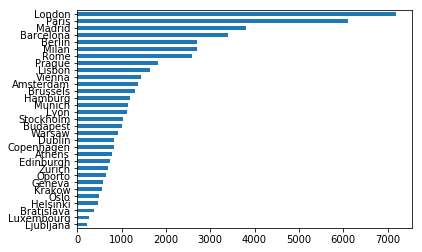

In [18]:
data['City'].value_counts(ascending=True).plot(kind='barh')

Создадим новые признаки

In [19]:
#Создадим словарь, демонстрирущий население территории города  - источник: wiki
city_population = {'Paris':2148, 'Stockholm':2353, 'London':8908, 
                   'Berlin':3644, 'Munich':1472, 'Oporto':237,
                   'Milan':1379, 'Bratislava':437, 'Vienna':1897, 
                   'Rome':2871, 'Barcelona':1664, 'Madrid':3266,
                   'Dublin':1173, 'Brussels':179, 'Zurich':428, 
                   'Warsaw':1791, 'Budapest':1752, 'Copenhagen':615,
                   'Amsterdam':872, 'Lyon':507, 'Hamburg':1841, 
                   'Lisbon':506, 'Prague':1301, 'Oslo':1558,
                   'Helsinki':655, 'Edinburgh':488, 'Geneva':201, 
                   'Ljubljana':284, 'Athens':664,'Luxembourg':626, 
                   'Krakow':2384}

#Создадим словарь, демонстрирущий количество ресторанов в городе, представленных в Tripadvisor (на 06.05.2021):
city_rest = {'Paris':17181, 'Stockholm':3019, 'London':19991, 
                   'Berlin':6215, 'Munich':3156, 'Oporto':1991,
                   'Milan':7442, 'Bratislava':1272, 'Vienna':4129, 
                   'Rome':10994, 'Barcelona':9544, 'Madrid':11455,
                   'Dublin':2349, 'Brussels':3628, 'Zurich':1860, 
                   'Warsaw':3264, 'Budapest':3067, 'Copenhagen':2347,
                   'Amsterdam':4011, 'Lyon':2796, 'Hamburg':3254, 
                   'Lisbon':4923, 'Prague':5395, 'Oslo':1280,
                   'Helsinki':1508, 'Edinburgh':1904, 'Geneva':1605, 
                   'Ljubljana':600, 'Athens':2548,'Luxembourg':740, 
                   'Krakow':1762}


#Создадим признаки
data['city_population'] = data['City'].map(city_population)
data['city_rest'] = data['City'].map(city_rest)
data.sample(5)


,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,restaurant_chain,city_population,city_rest
42303,Prague,"['Italian', 'Pizza', 'European', 'Vegetarian F...",1562.0,$$ - $$$,345.0,"[['Well priced and good service', 'Popped in f...",/Restaurant_Review-g274707-d800593-Reviews-Piz...,d800593,1,3.5,1.0,1301,5395
31683,Copenhagen,"['French', 'European', 'Danish', 'Vegetarian F...",691.0,$$ - $$$,26.0,"[['Good concept, good taste , more than reaso....",/Restaurant_Review-g189541-d11857839-Reviews-D...,d11857839,1,4.0,1.0,615,2347
29768,Lisbon,"['Italian', 'Mediterranean', 'European', 'Port...",431.0,$$ - $$$,545.0,"[['The aged Porto burger....', 'Great dinner']...",/Restaurant_Review-g189158-d3249290-Reviews-Ap...,d3249290,1,4.0,1.0,506,4923
15805,Paris,"['Japanese', 'Sushi', 'Asian', 'Vegetarian Fri...",1821.0,$$$$,74.0,"[['Just amazing', 'Hip and Upbeat with Tasty F...",/Restaurant_Review-g187147-d9582199-Reviews-Ki...,d9582199,1,4.5,1.0,2148,17181
4577,Geneva,"['American', 'Bar', 'European', 'Vegetarian Fr...",176.0,$$ - $$$,91.0,"[['Been looking for this type of place!', 'A l...",/Restaurant_Review-g188057-d7100317-Reviews-Th...,d7100317,0,0.0,1.0,201,1605


In [20]:
# На основании этих признаков создадим признак Rest to Pop: кол-во ресторанов на душу населения. Предполагаю, что чем выше кол-во ресторанов на население, тем сложнее добиться высокого рейтинга
data['Rest to Pop'] = round(data['city_population'] / data['city_rest'],3)
# Также создадим признак Rank to rest: Ранк ресторана в отношении кол-ва ресторанов:
data['Rank to rest'] = round(data['Ranking'] / data['city_rest'],3)

data.drop(["city_population", "city_rest"], 1, inplace=True)

In [21]:
#Создадим признаки, указывающие на популярность города среди туристов источник https://www.statista.com/statistics/314340/leading-european-city-tourism-destinations-by-number-of-bednights/
popular_cities = {'Paris':52.45, 'Stockholm':15.3, 'London':85.1, 
                   'Berlin':34.12, 'Munich':18.29, 'Oporto':10,
                   'Milan':10, 'Bratislava':10, 'Vienna':18.64, 
                   'Rome':29.07, 'Barcelona':19.85, 'Madrid':20.68,
                   'Dublin':14.87, 'Brussels':10, 'Zurich':10, 
                   'Warsaw':10, 'Budapest':10, 'Copenhagen':10,
                   'Amsterdam':18.38, 'Lyon':10, 'Hamburg':15.43, 
                   'Lisbon':13.82, 'Prague':18.48, 'Oslo':10,
                   'Helsinki':10, 'Edinburgh':10, 'Geneva':10, 
                   'Ljubljana':10, 'Athens':10,'Luxembourg':10, 
                   'Krakow':10}
data['popular_cities'] = data['City'].map(popular_cities)
data['rest_to_popular'] = round(data['Ranking'] / data['popular_cities'],2) #Создадим признак, отражающий Ранк ресторана с учетом популярности города

In [22]:
#Создадим признак, демонстрирующий является ли город столицей:
capitals = {'Paris':1, 'Stockholm':1, 'London':1, 
                   'Berlin':1, 'Munich':0, 'Oporto':0,
                   'Milan':0, 'Bratislava':1, 'Vienna':0, 
                   'Rome':1, 'Barcelona':0, 'Madrid':1,
                   'Dublin':1, 'Brussels':1, 'Zurich':1, 
                   'Warsaw':1, 'Budapest':1, 'Copenhagen':1,
                   'Amsterdam':1, 'Lyon':0, 'Hamburg':0, 
                   'Lisbon':1, 'Prague':1, 'Oslo':1,
                   'Helsinki':1, 'Edinburgh':0, 'Geneva':0, 
                   'Ljubljana':1, 'Athens':1,'Luxembourg':1, 
                   'Krakow':0}
data['capitals'] = data['City'].map(capitals)

#### Cousine Style - виды кухни которые предствлены в ресторане

In [23]:
display(data['Cuisine Style'].describe())
display(data['Cuisine Style'].isna().value_counts())

count           38410
unique          10731
top       ['Italian']
freq             1332
Name: Cuisine Style, dtype: object

False    38410
True     11590
Name: Cuisine Style, dtype: int64

In [24]:
cuisine_style = data['Cuisine Style'].str.findall(r"'(\b.*?\b)'") # применим регулярные выражения для поиска наиболее частого встречающегося варианта
cuisine_style.explode().value_counts()

Vegetarian Friendly    14021
European               12561
Mediterranean           7820
Italian                 7433
Vegan Options           5684
                       ...  
Fujian                     2
Burmese                    1
Salvadoran                 1
Xinjiang                   1
Latvian                    1
Name: Cuisine Style, Length: 125, dtype: int64

Наиболле часто встречаемая кухня: Vegetarian Friendly, но я заполню пустые значения значением European, что более вероятно 

In [25]:
mapping = re.compile(r"'(\b.*?\b)'") 
data['cuisine_style'] = data['Cuisine Style'].apply(lambda x: 'European' if pd.isnull(x) else mapping.findall(x)) # заполним новый признак списком

In [26]:
data['cuisine_style'].explode().value_counts()

European               24151
Vegetarian Friendly    14021
Mediterranean           7820
Italian                 7433
Vegan Options           5684
                       ...  
Fujian                     2
Burmese                    1
Salvadoran                 1
Xinjiang                   1
Latvian                    1
Name: cuisine_style, Length: 125, dtype: int64

In [27]:
#Создадим новый признак, отражающий кол-во видов кухонь, представленных в ресторане:
data['cuisine_count'] = data['cuisine_style'].apply(lambda x: len(x))

In [28]:
data.sample()

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,restaurant_chain,Rest to Pop,Rank to rest,popular_cities,rest_to_popular,capitals,cuisine_style,cuisine_count
23356,Paris,"['French', 'Bar', 'Cafe', 'European', 'Vegetar...",9876.0,$$ - $$$,355.0,"[['It used to be a ""must visit""; it is only a....",/Restaurant_Review-g187147-d695240-Reviews-Caf...,d695240,1,3.0,1.0,0.125,0.575,52.45,188.29,1,"[French, Bar, Cafe, European, Vegetarian Frien...",5


In [29]:
#создам признак, демонстрирующий является ли кухня, представленная в ресторане национальной.
national_cuisine = {'Paris':['French'], 'Stockholm':['Swedish', 'Scandinavian'], 'London':['British'], 
                   'Berlin':['German'], 'Munich':['German'], 'Oporto':['Portuguese'],
                   'Milan':['Italian','Pizza'], 'Bratislava':['Slovenian'], 'Vienna':['Austrian'], 
                   'Rome':['Italian','Pizza'], 'Barcelona':['Spanish'], 'Madrid':['Spanish'],
                  'Dublin':['Irish'], 'Brussels':['Belgian','Seafood'], 'Zurich':['Swiss'], 
                  'Warsaw':['Polish'], 'Budapest':['Hungarian'], 'Copenhagen':['Danish', 'Scandinavian'],
                   'Amsterdam':['Dutch'], 'Lyon':['French'], 'Hamburg':['German'], 
                   'Lisbon':['Portuguese'], 'Prague':['Czech'], 'Oslo':['Norwegian', 'Scandinavian'],
                   'Helsinki':['Seafood','Scandinavian'], 'Edinburgh':['Scottish'], 'Geneva':['Swiss'], 
                   'Ljubljana':['Croatian'], 'Athens':['Greek'],'Luxembourg':['Belgian','French','German'], 
                   'Krakow':['Polish']}

            
# Создадим функцию, позволяющую отразить наличие местной кухни в ресторане
def show_local_food(data):   
    data['local_cuisine'] = 0
    for i in range(len(data)):
        current_city = data.City[i]
        for cuis in national_cuisine[current_city]:
            if cuis in data['cuisine_style'][i]:
                data['local_cuisine'][i] = 1
                break
            else:
                pass            
            
            
            
show_local_food(data)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
restaurant_chain     50000 non-null float64
Rest to Pop          50000 non-null float64
Rank to rest         50000 non-null float64
popular_cities       50000 non-null float64
rest_to_popular      50000 non-null float64
capitals             50000 non-null int64
cuisine_style        50000 non-null object
cuisine_count        50000 non-null int64
local_cuisine        50000 non-null int64
dtypes: float64(8), int64(4), object(7)
memory usage: 7.2+ MB


#### Price Range

In [31]:
display(data['Price Range'].describe())
display(data['Price Range'].explode().value_counts())

count        32639
unique           3
top       $$ - $$$
freq         23041
Name: Price Range, dtype: object

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

есть пропуски - заполним наиболее частным значение, приведем признак к числовому значения через словарь 


In [32]:
data['Price Range'] = data['Price Range'].fillna('$$ - $$$')
price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}

# выполним преобразование
data['Price Range'].replace(price_dict, inplace=True)

In [33]:
data['Price Range'].isna().value_counts()

False    50000
Name: Price Range, dtype: int64

####  Number of Reviews


In [34]:
data['Number of Reviews'].isna().value_counts() # есть пропуски

False    46800
True      3200
Name: Number of Reviews, dtype: int64

In [35]:
#Заполним все пропуски на 0:
data['Number of Reviews'] = data['Number of Reviews'].apply (lambda x: 0 if pd.isnull(x) else x)

#### Reviews

смотрим как выглядит признак


In [36]:
data.Reviews.value_counts()[:7] 

[[], []]                                                                                                             8112
[['Excellent'], ['09/03/2015']]                                                                                         2
[['Very cozy!', 'Service rate: 1'], ['01/17/2016', '11/18/2015']]                                                       2
[['Good restaurant for one meal.', 'Olive Garden Restaurant Warsaw. Food very...'], ['04/20/2015', '07/15/2013']]       2
[['Visited the rooftop bar', 'SIXTH FLOOR ROOFTOP BUT YOU CAN ONLY SEE O...'], ['06/27/2017', '10/31/2017']]            2
[['Simply Excellent!', 'Modern!'], ['10/22/2017', '08/29/2017']]                                                        2
[['Very good all around', 'Our first Madrid restaurant'], ['11/20/2017', '10/11/2017']]                                 2
Name: Reviews, dtype: int64

очень много пустых значений [[], []], заменим и на Nan 

In [37]:
data["Reviews"] = data.Reviews.apply(lambda x: np.nan if x == "[[], []]" else x)
data['Reviews_isNAN'] = pd.isna(data['Reviews']).astype('uint8')
data.sample(3)

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,restaurant_chain,Rest to Pop,Rank to rest,popular_cities,rest_to_popular,capitals,cuisine_style,cuisine_count,local_cuisine,Reviews_isNAN
31514,Berlin,['German'],5356.0,2,11.0,"[['delicious!', 'mediocre'], ['09/28/2017', '1...",/Restaurant_Review-g187323-d6476763-Reviews-Re...,d6476763,1,3.5,1.0,0.586,0.862,34.12,156.98,1,[German],1,1,0
1405,Paris,['French'],13137.0,2,3.0,[['Part of Renaissance hotel - room service i....,/Restaurant_Review-g187147-d4163590-Reviews-Ba...,d4163590,0,0.0,1.0,0.125,0.765,52.45,250.47,1,[French],1,1,0
33457,Munich,NaN,2745.0,2,3.0,"[['Fast food'], ['11/11/2014']]",/Restaurant_Review-g187309-d5776365-Reviews-Am...,d5776365,1,2.0,1.0,0.466,0.870,18.29,150.08,0,European,8,0,0


In [38]:
#извлечем даты из Reviews:
# Сделаем из строки лист (метод split)
data["Reviews_list"] = data.Reviews.apply(lambda x: x.split("],") if type(x) != float else "nan")

# Сохраним второй элемент получившегося листа в отдельный столбец
data["date_rev"] = data.Reviews_list.apply(lambda x: x[1][2:-2].split(", ") if type(x) != str else x)


data.date_rev[2]

["'12/28/2017'", "'12/06/2017'"]

In [39]:
#если у нас только один отзыв:
data['rev_single'] = data.date_rev.apply(lambda x: 1 if len(x) == 1 else 0)
# создадим колонки с датами
data["date_1"] = data.date_rev.apply(lambda x: x[0] if type(x) != str else x)
data["date_2"] = data.date_rev.apply(lambda x: x[1] if (type(x) != str) & (len(x) > 1) else x[0])

#у нас есть колонки с датами, записанные как string, переведем их в формат дат:
import datetime
from datetime import datetime, timedelta #надо вынести вверх

data["date_1"] = data.date_1.apply(lambda x: datetime.strptime(x, "'%m/%d/%Y'") if len(x) > 4 else np.nan)
data["date_2"] = data.date_2.apply(lambda x: datetime.strptime(x, "'%m/%d/%Y'") if len(x) > 4 else np.nan)

print(data.date_1.dtypes, data.date_2.dtypes)



datetime64[ns] datetime64[ns]


In [40]:
#удаляем вспомогательные колонки ( reviews_list, date_rev) и создаем признак date_delta
data.drop(["Reviews_list", "date_rev"], axis=1, inplace=True)

data["date_delta"] = abs(data["date_1"] - data["date_2"])
data["date_delta"] = data["date_delta"].dt.days # Переведем дни в числовой формат
data.sample(5)

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,rest_to_popular,capitals,cuisine_style,cuisine_count,local_cuisine,Reviews_isNAN,rev_single,date_1,date_2,date_delta
8553,Copenhagen,"['Japanese', 'Sushi', 'Asian', 'Seafood']",900.0,2,27.0,"[['So good', 'Excellent Sushi'], ['10/12/2017'...",/Restaurant_Review-g189541-d942117-Reviews-Sac...,d942117,0,0.0,...,90.00,1,"[Japanese, Sushi, Asian, Seafood]",4,0,0,0,2017-10-12,2017-12-26,75.0
11069,Paris,"['French', 'Contemporary', 'Pub', 'Gastropub']",3502.0,2,41.0,"[['Wonderful meal', 'Excellent taste and nice ...",/Restaurant_Review-g187147-d11734174-Reviews-L...,d11734174,1,4.5,...,66.77,1,"[French, Contemporary, Pub, Gastropub]",4,1,0,0,2017-07-01,2017-04-26,66.0
20406,Rome,NaN,1937.0,2,47.0,NaN,/Restaurant_Review-g187791-d9712381-Reviews-Ho...,d9712381,1,4.5,...,66.63,1,European,8,0,1,0,NaT,NaT,NaN
46012,Hamburg,['Pizza'],877.0,2,15.0,NaN,/Restaurant_Review-g187331-d7138800-Reviews-Ca...,d7138800,1,4.5,...,56.84,0,[Pizza],1,0,1,0,NaT,NaT,NaN
20328,London,"['Chinese', 'Fast Food', 'Asian', 'Vegetarian ...",7120.0,1,268.0,"[['Big portions', 'Solo soup, late night meal'...",/Restaurant_Review-g186338-d1113237-Reviews-Ta...,d1113237,1,3.5,...,83.67,1,"[Chinese, Fast Food, Asian, Vegetarian Friendly]",4,0,0,0,2017-12-12,2017-12-03,9.0


In [41]:
#Cоздадим новый признак "Fresh_review": кол-во дней с момента последнего отзыва
def fresh_review(row):
    if (str(row.date_1) == "NaT") & (str(row.date_2) == "NaT"):
        return np.nan
    return (min(datetime.now() - row.date_1, datetime.now() - row.date_2)).days

data["Fresh_review"] = data.apply(fresh_review, 1)

In [42]:
data.sample(5)

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,capitals,cuisine_style,cuisine_count,local_cuisine,Reviews_isNAN,rev_single,date_1,date_2,date_delta,Fresh_review
3614,London,"['Cafe', 'Vegetarian Friendly']",6655.0,2,21.0,"[['The great bakery of Area !', 'Lovely little...",/Restaurant_Review-g186338-d8646559-Reviews-Ga...,d8646559,0,0.0,...,1,"[Cafe, Vegetarian Friendly]",2,0,0,0,2017-12-12,2017-07-03,162.0,1253.0
18984,Milan,"['Chinese', 'Thai', 'Vegetarian Friendly']",1541.0,2,183.0,"[['Good Chinese (& more) food', 'Well worth a ...",/Restaurant_Review-g187849-d2014198-Reviews-Ri...,d2014198,1,4.0,...,0,"[Chinese, Thai, Vegetarian Friendly]",3,0,0,0,2017-08-23,2016-12-22,244.0,1364.0
4060,Oslo,NaN,443.0,2,19.0,"[['Really nice tapas.', 'Ok'], ['07/18/2017', ...",/Restaurant_Review-g190479-d9561577-Reviews-Bu...,d9561577,0,0.0,...,1,European,8,0,0,0,2017-07-18,2017-11-13,118.0,1282.0
33263,Dublin,NaN,1727.0,2,4.0,"[[""Small but cosy bar, cheap pints, I'll be b....",/Restaurant_Review-g186605-d3803369-Reviews-Ca...,d3803369,1,3.0,...,1,European,8,0,0,0,2017-06-14,2017-05-23,22.0,1434.0
1431,Vienna,NaN,2572.0,2,10.0,"[['Fantastic place', 'Really passion of it.'],...",/Restaurant_Review-g190454-d5966176-Reviews-Pa...,d5966176,0,0.0,...,0,European,8,0,0,0,2016-08-31,2015-07-19,409.0,1721.0


In [43]:
# Заполню все пропуски на 0. Я считаю, что раз отзывов нет, значит их нет и не нужно дорисовывать. Плюс проверила на EMAE
data['date_delta'] = data['date_delta'].fillna(0)
data['Fresh_review'] = data['Fresh_review'].fillna(0)

#### cuisine_style

рассмотрим уже созданный признак cusin_style и создадим новые признаки этом основании - представим что каждому виду кухни будет соответствовать 1, при отсутствии этого вида кухни 0

In [44]:
data.head(5)

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,capitals,cuisine_style,cuisine_count,local_cuisine,Reviews_isNAN,rev_single,date_1,date_2,date_delta,Fresh_review
0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,NaN,/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,1,"[Bar, Pub]",2,0,1,0,NaT,NaT,0.0,0.0
1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,1,"[European, Scandinavian, Gluten Free Options, ...",5,1,0,0,2017-12-05,2017-10-29,37.0,1260.0
2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,[Vegetarian Friendly],1,0,0,0,2017-12-28,2017-12-06,22.0,1237.0
3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,1,"[Italian, Mediterranean, European, Vegetarian ...",5,0,0,0,2017-12-06,2017-11-22,14.0,1259.0
4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,1,"[Italian, Mediterranean, European, Seafood, Ve...",6,0,0,0,2018-02-08,2018-01-24,15.0,1195.0


#### URL_TA и ID_TA

In [45]:
data['URL_TA'].describe() # предствляет собой страницы ресторанов с трипэдвайзера - в модели учавствовать не будет (хотя интересно что есть повторяющееся значения)

count                                                 50000
unique                                                49963
top       /Restaurant_Review-g187514-d4748208-Reviews-Re...
freq                                                      2
Name: URL_TA, dtype: object

In [46]:
data['ID_TA'].describe() # предствляет собой ID ресторана на том же самом сайте - в модели учавствовать не будет 

count         50000
unique        49963
top       d11921719
freq              2
Name: ID_TA, dtype: object

**City**

### Посмотрим распределение признака

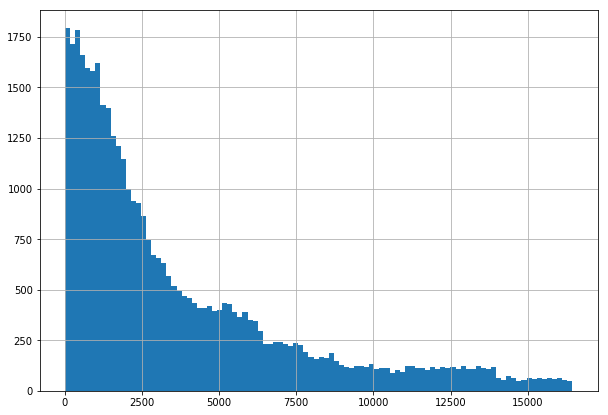

In [47]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

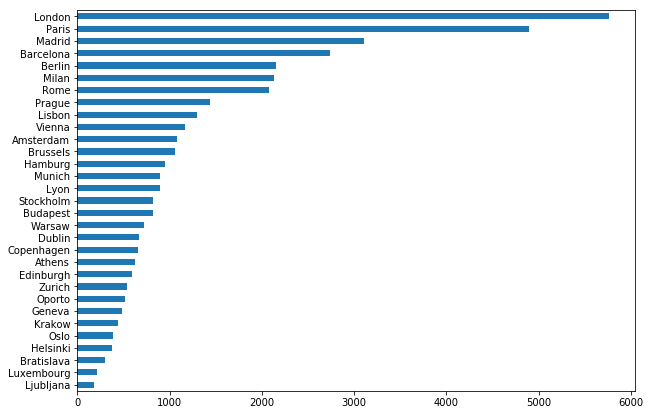

In [48]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

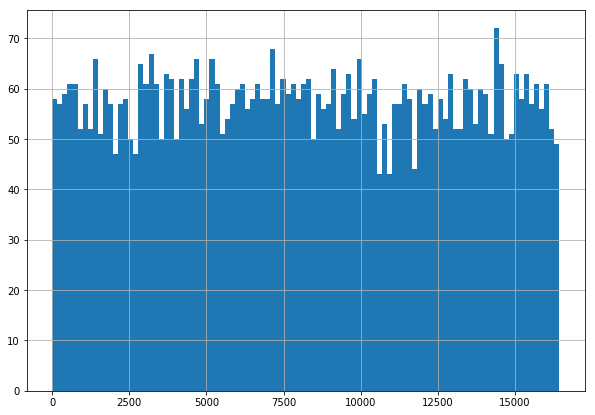

In [49]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

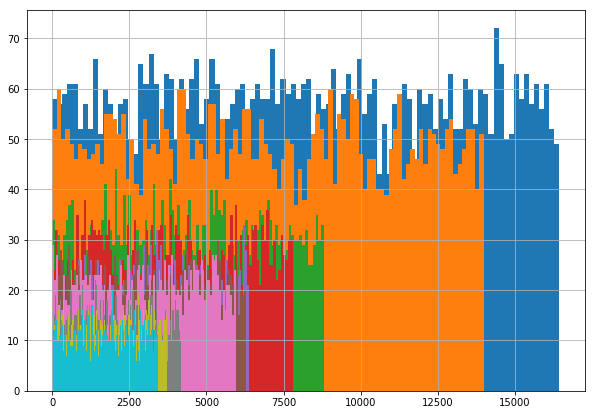

In [50]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

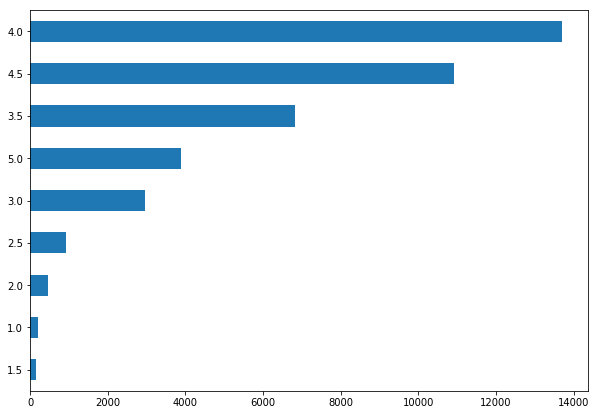

In [51]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

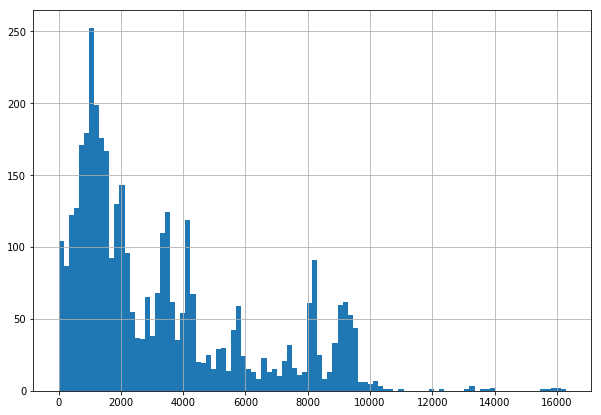

In [52]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

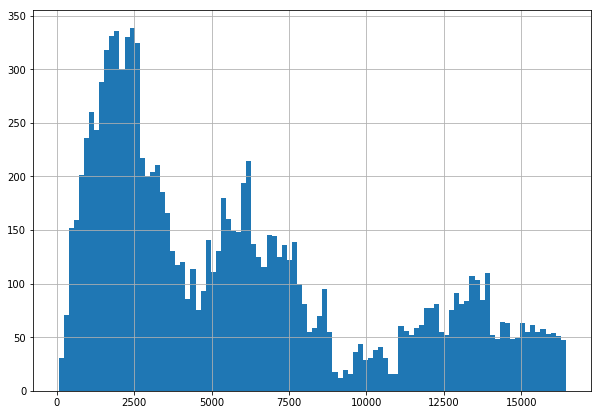

In [53]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

,Ranking,Price Range,Number of Reviews,Rating,restaurant_chain,Rest to Pop,Rank to rest,popular_cities,rest_to_popular,capitals,cuisine_count,local_cuisine,Reviews_isNAN,rev_single,date_delta,Fresh_review
Ranking,1.000000,-0.026334,-0.223198,-0.109897,-0.502592,-0.108816,0.563040,0.655860,0.486130,0.230766,-0.055628,-0.123673,0.107399,0.085979,0.069256,0.003751
Price Range,-0.026334,1.000000,0.107732,-0.012176,0.005652,-0.002209,-0.033527,-0.002113,-0.031973,0.002502,0.180551,-0.012955,0.076912,-0.002905,-0.035117,-0.057204
Number of Reviews,-0.223198,0.107732,1.000000,0.011006,0.061956,-0.039251,-0.407297,0.022365,-0.284501,0.004452,0.058146,0.222912,-0.164385,-0.129100,-0.087310,0.036313
Rating,-0.109897,-0.012176,0.011006,1.000000,0.150831,0.005628,-0.170460,-0.004951,-0.145776,0.004494,0.011943,0.011399,-0.010309,0.004488,-0.025995,-0.006710
restaurant_chain,-0.502592,0.005652,0.061956,0.150831,1.000000,-0.002467,-0.233932,-0.330817,-0.107957,-0.122818,0.022385,0.067005,0.026751,-0.013889,-0.040222,-0.053617
Rest to Pop,-0.108816,-0.002209,-0.039251,0.005628,-0.002467,1.000000,0.029140,0.053388,-0.267245,0.052588,0.064785,-0.143843,-0.084086,-0.015922,0.002393,0.063131
Rank to rest,0.563040,-0.033527,-0.407297,-0.170460,-0.233932,0.029140,1.000000,0.010925,0.704574,-0.040053,0.000236,-0.242269,0.281236,0.202433,0.111820,-0.057705
popular_cities,0.655860,-0.002113,0.022365,-0.004951,-0.330817,0.053388,0.010925,1.000000,-0.122672,0.394116,-0.053735,-0.062729,-0.142263,-0.052571,-0.002960,0.092627
rest_to_popular,0.486130,-0.031973,-0.284501,-0.145776,-0.107957,-0.267245,0.704574,-0.122672,1.000000,-0.191766,-0.005891,-0.070392,0.371049,0.163853,0.045143,-0.171795
capitals,0.230766,0.002502,0.004452,0.004494,-0.122818,0.052588,-0.040053,0.394116,-0.191766,1.000000,-0.039609,-0.015713,-0.106367,-0.016723,0.000815,0.074819


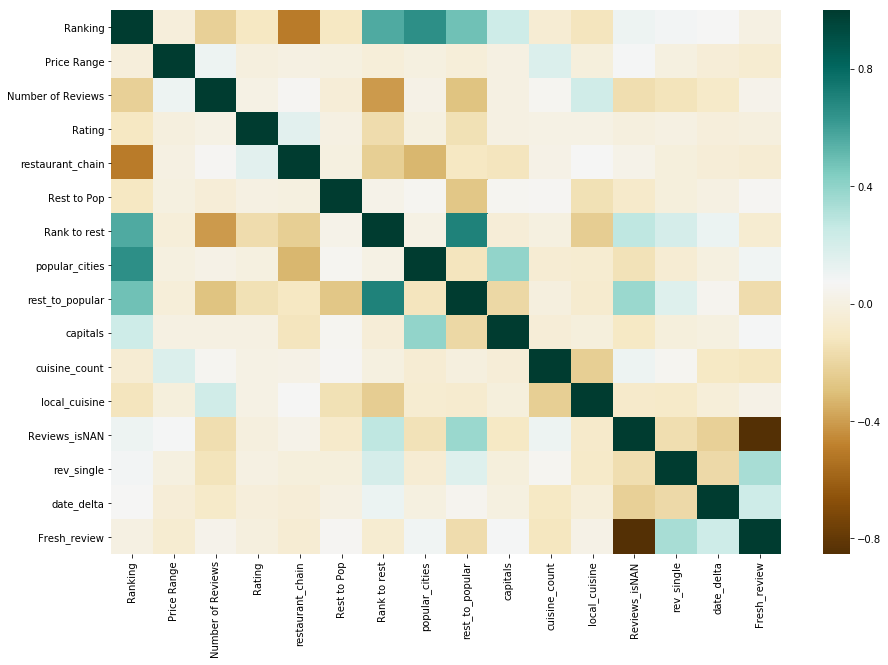

In [54]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),cmap="BrBG")
data.drop(['sample'], axis=1).corr()

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [55]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [56]:
def preparation(data):
    ############ПРОРАБОТКА ПРИЗНАКОВ###########

    ############ Restaurant_id - порядковый номер ресторана ###########

    #Добавим новый признак в нашу модель - представим что 0 будет соответствовать уникальному ресторану (id = 1) а 1 будет отвечать сети ресторанов (id > 1)
    restaurant_chain = data['Restaurant_id'].value_counts()[data['Restaurant_id'].value_counts()>1].index.tolist()
    data['restaurant_chain'] = data[data['Restaurant_id'].isin(restaurant_chain)].Restaurant_id.apply(lambda x: 1) # заполняем единицей
    data['restaurant_chain'] = data['restaurant_chain'].fillna(0) # заполняем остаток 0
    #Удалим столбец Restaurant_id:
    data.drop(["Restaurant_id"], axis=1, inplace=True)

    ############ City - город ###########

    #Создадим новые признаки:
    #Создадим словарь, демонстрирущий население территории города  - источник: wiki
    city_population = {'Paris':2148, 'Stockholm':2353, 'London':8908, 
                   'Berlin':3644, 'Munich':1472, 'Oporto':237,
                   'Milan':1379, 'Bratislava':437, 'Vienna':1897, 
                   'Rome':2871, 'Barcelona':1664, 'Madrid':3266,
                   'Dublin':1173, 'Brussels':179, 'Zurich':428, 
                   'Warsaw':1791, 'Budapest':1752, 'Copenhagen':615,
                   'Amsterdam':872, 'Lyon':507, 'Hamburg':1841, 
                   'Lisbon':506, 'Prague':1301, 'Oslo':1558,
                   'Helsinki':655, 'Edinburgh':488, 'Geneva':201, 
                   'Ljubljana':284, 'Athens':664,'Luxembourg':626, 
                   'Krakow':2384}

        #Создадим словарь, демонстрирущий количество ресторанов в городе, представленных в Tripadvisor (на 06.05.2021):
    city_rest = {'Paris':17181, 'Stockholm':3019, 'London':19991, 
                   'Berlin':6215, 'Munich':3156, 'Oporto':1991,
                   'Milan':7442, 'Bratislava':1272, 'Vienna':4129, 
                   'Rome':10994, 'Barcelona':9544, 'Madrid':11455,
                   'Dublin':2349, 'Brussels':3628, 'Zurich':1860, 
                   'Warsaw':3264, 'Budapest':3067, 'Copenhagen':2347,
                   'Amsterdam':4011, 'Lyon':2796, 'Hamburg':3254, 
                   'Lisbon':4923, 'Prague':5395, 'Oslo':1280,
                   'Helsinki':1508, 'Edinburgh':1904, 'Geneva':1605, 
                   'Ljubljana':600, 'Athens':2548,'Luxembourg':740, 
                   'Krakow':1762}


    #И создадим сами признаки
    data['city_population'] = data['City'].map(city_population)
    data['city_rest'] = data['City'].map(city_rest)


    # На основании этих признаков создадим признак Rest to Pop: кол-во ресторанов на душу населения. Предполагаю, что чем выше кол-во ресторанов на население, тем сложнее добиться высокого рейтинга
    data['Rest to Pop'] = round(data['city_population'] / data['city_rest'],3)
    # Также создадим признак Rank to rest: Ранк ресторана в отношении кол-ва ресторанов:
    data['Rank to rest'] = round(data['Ranking'] /data['city_rest'] ,3)

    data.drop(["city_population", "city_rest"], 1, inplace=True)

    #Создадим признаки, указывающие на популярность города среди туристов источник https://www.statista.com/statistics/314340/leading-european-city-tourism-destinations-by-number-of-bednights/
    popular_cities = {'Paris':52.45, 'Stockholm':15.3, 'London':85.1, 
                   'Berlin':34.12, 'Munich':18.29, 'Oporto':1,
                   'Milan':1, 'Bratislava':1, 'Vienna':18.64, 
                   'Rome':29.07, 'Barcelona':19.85, 'Madrid':20.68,
                   'Dublin':14.87, 'Brussels':1, 'Zurich':1, 
                   'Warsaw':1, 'Budapest':1, 'Copenhagen':1,
                   'Amsterdam':18.38, 'Lyon':1, 'Hamburg':15.43, 
                   'Lisbon':13.82, 'Prague':18.48, 'Oslo':1,
                   'Helsinki':1, 'Edinburgh':1, 'Geneva':1, 
                   'Ljubljana':1, 'Athens':1,'Luxembourg':1, 
                   'Krakow':1}
    data['popular_cities'] = data['City'].map(popular_cities)
    data['rest_to_popular'] =data['popular_cities']/ round(data['Ranking'] ,2) #Создадим признак, отражающий Ранк ресторана с учетом популярности города

    #Создадим признак, демонстрирующий является ли город столицей:
    capitals = {'Paris':1, 'Stockholm':1, 'London':1, 
                   'Berlin':1, 'Munich':0, 'Oporto':0,
                   'Milan':0, 'Bratislava':1, 'Vienna':0, 
                   'Rome':1, 'Barcelona':0, 'Madrid':1,
                   'Dublin':1, 'Brussels':1, 'Zurich':1, 
                   'Warsaw':1, 'Budapest':1, 'Copenhagen':1,
                   'Amsterdam':1, 'Lyon':0, 'Hamburg':0, 
                   'Lisbon':1, 'Prague':1, 'Oslo':1,
                   'Helsinki':1, 'Edinburgh':0, 'Geneva':0, 
                   'Ljubljana':1, 'Athens':1,'Luxembourg':1, 
                   'Krakow':0}
    data['capitals'] = data['City'].map(capitals)

    ############ Cousine Style - виды кухни которые предствлены в ресторане ###########

    cuisine_style = data['Cuisine Style'].str.findall(r"'(\b.*?\b)'") # применим регулярные выражения для поиска наиболее частого встречающегося варианта
    cuisine_style.explode().value_counts()
    #Наиболле часто встречаемая кухня: Vegetarian Friendly, но я заполню пустые значения значением European, что более вероятно
    mapping = re.compile(r"'(\b.*?\b)'") 
    data['cuisine_style'] = data['Cuisine Style'].apply(lambda x: 'European' if pd.isnull(x) else mapping.findall(x)) # заполним новый признак списком
    #Создадим новый признак, отражающий кол-во видов кухонь, представленных в ресторане:
    data['cuisine_count'] = data['cuisine_style'].apply(lambda x: len(x))
    #создам признак, демонстрирующий является ли кухня, представленная в ресторане национальной.
    national_cuisine = {'Paris':['French'], 'Stockholm':['Swedish', 'Scandinavian'], 'London':['British'], 
                   'Berlin':['German'], 'Munich':['German'], 'Oporto':['Portuguese'],
                   'Milan':['Italian','Pizza'], 'Bratislava':['Slovenian'], 'Vienna':['Austrian'], 
                   'Rome':['Italian','Pizza'], 'Barcelona':['Spanish'], 'Madrid':['Spanish'],
                  'Dublin':['Irish'], 'Brussels':['Belgian','Seafood'], 'Zurich':['Swiss'], 
                  'Warsaw':['Polish'], 'Budapest':['Hungarian'], 'Copenhagen':['Danish', 'Scandinavian'],
                   'Amsterdam':['Dutch'], 'Lyon':['French'], 'Hamburg':['German'], 
                   'Lisbon':['Portuguese'], 'Prague':['Czech'], 'Oslo':['Norwegian', 'Scandinavian'],
                   'Helsinki':['Seafood','Scandinavian'], 'Edinburgh':['Scottish'], 'Geneva':['Swiss'], 
                   'Ljubljana':['Croatian'], 'Athens':['Greek'],'Luxembourg':['Belgian','French','German'], 
                   'Krakow':['Polish']}

            
    # Создадим функцию, позволяющую отразить наличие местной кухни в ресторане
    def show_local_food(data):   
        data['local_cuisine'] = 0
        for i in range(len(data)):
            current_city = data.City[i]
            for cuis in national_cuisine[current_city]:
                if cuis in data['cuisine_style'][i]:
                    data['local_cuisine'][i] = 1
                    break
                else:
                    pass                     
            
    show_local_food(data)

    ############ Price Range - уровень цен ###########

    #есть пропуски - заполним наиболее частным значение, приведем признак к числовому значения через словарь
    data['Price Range'] = data['Price Range'].fillna('$$ - $$$')
    price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
    # выполним преобразование
    data['Price Range'].replace(price_dict, inplace=True)

    ############ Number of Reviews - количество отзывов ############ 

    #Заполним все пропуски на 0:
    data['Number of Reviews'] = data['Number of Reviews'].apply (lambda x: 0 if pd.isnull(x) else x)

    ############ Reviews - отзывы ############ 

    #очень много пустых значений [[], []], заменим и на Nan
    data["Reviews"] = data.Reviews.apply(lambda x: np.nan if x == "[[], []]" else x)
    data['Reviews_isNAN'] = pd.isna(data['Reviews']).astype('uint8')
    #извлечем даты из Reviews:
    # Сделаем из строки лист (метод split)
    data["Reviews_list"] = data.Reviews.apply(lambda x: x.split("],") if type(x) != float else "nan")

    # Сохраним второй элемент получившегося листа в отдельный столбец
    data["date_rev"] = data.Reviews_list.apply(lambda x: x[1][2:-2].split(", ") if type(x) != str else x)
    #если у нас только один отзыв:
    data['rev_single'] = data.date_rev.apply(lambda x: 1 if len(x) == 1 else 0)
    # создадим колонки с датами
    data["date_1"] = data.date_rev.apply(lambda x: x[0] if type(x) != str else x)
    data["date_2"] = data.date_rev.apply(lambda x: x[1] if (type(x) != str) & (len(x) > 1) else x[0])

    #у нас есть колонки с датами, записанные как string, переведем их в формат дат:
    import datetime
    from datetime import datetime, timedelta #надо вынести вверх

    data["date_1"] = data.date_1.apply(lambda x: datetime.strptime(x, "'%m/%d/%Y'") if len(x) > 4 else np.nan)
    data["date_2"] = data.date_2.apply(lambda x: datetime.strptime(x, "'%m/%d/%Y'") if len(x) > 4 else np.nan)
    #удаляем вспомогательные колонки ( reviews_list, date_rev) и создаем признак date_delta
    data.drop(["Reviews_list", "date_rev"], axis=1, inplace=True)

    data["date_delta"] = abs(data["date_1"] - data["date_2"])
    data["date_delta"] = data["date_delta"].dt.days # Переведем дни в числовой формат
    
     
    #Cоздадим новый признак "Fresh_review": кол-во дней с момента последнего отзыва
    def fresh_review(row):
        if (str(row.date_1) == "NaT") & (str(row.date_2) == "NaT"):
            return np.nan
        return (min(datetime.now() - row.date_1, datetime.now() - row.date_2)).days

    data["Fresh_review"] = data.apply(fresh_review, 1)

    #заменим пропуски в time_delta и fresh_review на 0 (я считаю, что если нет отзывов, значит нестора непосещаемый, и не стоит заменять на медиану или сренее)
    data['date_delta'] = data['date_delta'].fillna(0)
    data['Fresh_review'] = data['Fresh_review'].fillna(0)
    #удаляем ненужные колонки Date_1, date_2:
    data.drop(["date_1", "date_2"], axis=1, inplace=True)

    ############ URL_TA и ID_TA ############ 

    #удалим:
    data.drop(["URL_TA","ID_TA"], axis=1, inplace=True)

  
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    #object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    #df_output.drop(object_columns, axis = 1, inplace=True)
    
    #return df_output

preparation(data)

object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Запускаем и проверяем что получилось

In [57]:

data.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,restaurant_chain,Rest to Pop,Rank to rest,popular_cities,rest_to_popular,capitals,cuisine_count,local_cuisine,Reviews_isNAN,rev_single,date_delta,Fresh_review
35994,2908.0,2,106.0,1,4.0,1.0,0.261,0.265,29.07,0.009997,1,1,1,0,1,0.0,3601.0
42037,987.0,1,44.0,1,4.0,1.0,0.103,0.200,13.82,0.014002,1,2,1,0,1,0.0,1561.0
24047,698.0,2,25.0,1,5.0,1.0,0.103,0.142,13.82,0.019799,1,3,1,0,0,97.0,1179.0
35411,5991.0,2,73.0,1,2.5,1.0,0.185,0.805,1.00,0.000167,0,8,0,0,0,3.0,2184.0
6309,3777.0,2,40.0,0,0.0,1.0,0.185,0.508,1.00,0.000265,0,3,0,0,0,346.0,1574.0
25428,1062.0,2,0.0,1,5.0,1.0,0.549,0.325,1.00,0.000942,1,8,0,1,0,0.0,0.0
13512,3611.0,2,3.0,1,5.0,1.0,0.285,0.315,20.68,0.005727,1,8,0,1,0,0.0,0.0
11293,5219.0,2,9.0,1,5.0,1.0,0.446,0.261,85.10,0.016306,1,8,0,0,0,9.0,1225.0
48679,1123.0,2,69.0,1,4.0,1.0,0.499,0.478,14.87,0.013241,1,3,1,0,0,199.0,1286.0
46472,794.0,2,10.0,1,4.5,1.0,0.230,0.427,1.00,0.001259,1,8,0,0,1,0.0,2329.0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
Ranking              50000 non-null float64
Price Range          50000 non-null int64
Number of Reviews    50000 non-null float64
sample               50000 non-null int64
Rating               50000 non-null float64
restaurant_chain     50000 non-null float64
Rest to Pop          50000 non-null float64
Rank to rest         50000 non-null float64
popular_cities       50000 non-null float64
rest_to_popular      50000 non-null float64
capitals             50000 non-null int64
cuisine_count        50000 non-null int64
local_cuisine        50000 non-null int64
Reviews_isNAN        50000 non-null uint8
rev_single           50000 non-null int64
date_delta           50000 non-null float64
Fresh_review         50000 non-null float64
dtypes: float64(10), int64(6), uint8(1)
memory usage: 6.2 MB


In [59]:
data.columns

Index(['Ranking', 'Price Range', 'Number of Reviews', 'sample', 'Rating',
       'restaurant_chain', 'Rest to Pop', 'Rank to rest', 'popular_cities',
       'rest_to_popular', 'capitals', 'cuisine_count', 'local_cuisine',
       'Reviews_isNAN', 'rev_single', 'date_delta', 'Fresh_review'],
      dtype='object')

In [60]:
data.select_dtypes(include=['float'])

,Ranking,Number of Reviews,Rating,restaurant_chain,Rest to Pop,Rank to rest,popular_cities,rest_to_popular,date_delta,Fresh_review
0,12963.0,4.0,0.0,1.0,0.125,0.754,52.45,0.004046,0.0,0.0
1,106.0,97.0,0.0,1.0,0.434,0.070,1.00,0.009434,37.0,1260.0
2,810.0,28.0,0.0,1.0,0.256,0.425,1.00,0.001235,22.0,1237.0
3,1669.0,202.0,0.0,1.0,0.446,0.083,85.10,0.050989,14.0,1259.0
4,37.0,162.0,0.0,1.0,0.344,0.029,1.00,0.027027,15.0,1195.0
...,...,...,...,...,...,...,...,...,...,...
49995,500.0,79.0,4.5,1.0,0.185,0.067,1.00,0.002000,34.0,1249.0
49996,6341.0,542.0,3.5,1.0,0.125,0.369,52.45,0.008272,9.0,1244.0
49997,1652.0,4.0,4.5,1.0,0.779,0.547,15.30,0.009262,3127.0,1657.0
49998,641.0,70.0,4.0,1.0,0.549,0.196,1.00,0.001560,23.0,1407.0


In [61]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s


MAE: 0.20552875


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


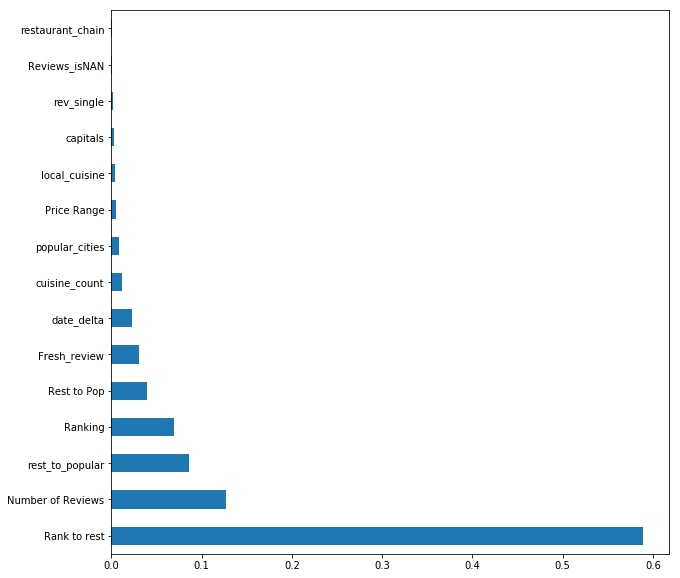

In [62]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [63]:
test_data = test_data.drop(['Rating'], axis=1)

In [64]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [65]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [66]:
predict_submission

array([3.03 , 4.215, 4.26 , ..., 2.995, 4.48 , 4.435])

In [67]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission_1.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.030
1,id_1,4.215
2,id_2,4.260
3,id_3,4.290
4,id_4,4.495
5,id_5,4.410
6,id_6,1.790
7,id_7,2.920
8,id_8,4.245
9,id_9,4.605


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
